# Zoolog

Zoolog, penguen türlerini tanıma konusunda uzmandır. Uzmanımızın adlandırabildiği 3 penguen türü şunlardır:

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/palmer-penguins.png" width=1000>

Peki siz onları ayırt edebiliyor musunuz?


## Görev

Penguenler hakkında hiçbir şey bilmediğimiz için, bu penguenleri özelliklerine göre sınıflandırmak için bir Makine Öğrenimi algoritması kullanalım.

## Dataset’i yükleyin

Seaborn [Penguins dataset](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv)’ini bir DataFrame içine yükleyelim. İşleri kolaylaştırmak için `nans` değerlerinden kurtulun! Aşağıdaki çıktıyı elde etmelisiniz:

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/penguin-df.png' width=600>

In [10]:
import seaborn as sns
import pandas as pd

# Dataset'i Seaborn kütüphanesinden yüklüyoruz
penguin_df = sns.load_dataset('penguins')

# Eksik verilerden (NaN) kurtuluyoruz
penguin_df = penguin_df.dropna()

# İlk 5 satırı görüntüleyerek kontrol edelim
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


❓Penguenlerin özellikleri nelerdir?

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png' width=700>

❓Bu veri setinde kaç tür penguen var?

In [11]:
# Sütun isimlerini (özellikleri) görelim
print("Özellikler (Columns):")
print(penguin_df.columns.tolist())

print("-" * 30)

# Kaç farklı tür olduğunu ve isimlerini görelim
unique_species = penguin_df['species'].unique()
num_species = penguin_df['species'].nunique()

print(f"Toplam Tür Sayısı: {num_species}")
print(f"Tür İsimleri: {unique_species}")

Özellikler (Columns):
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
------------------------------
Toplam Tür Sayısı: 3
Tür İsimleri: ['Adelie' 'Chinstrap' 'Gentoo']


❓Veri setinde her tür için kaç gözlem var?

In [12]:
# Tür dağılımını (kaç adet olduklarını) görelim
species_counts = penguin_df['species'].value_counts()
print(species_counts)

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


In [13]:
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


##  Veri görselleştirme (Data visualization)

‘bill_length_mm’ değerini ‘bill_depth_mm’ değerine göre, her tür için farklı bir renk kullanarak grafikte gösterin:

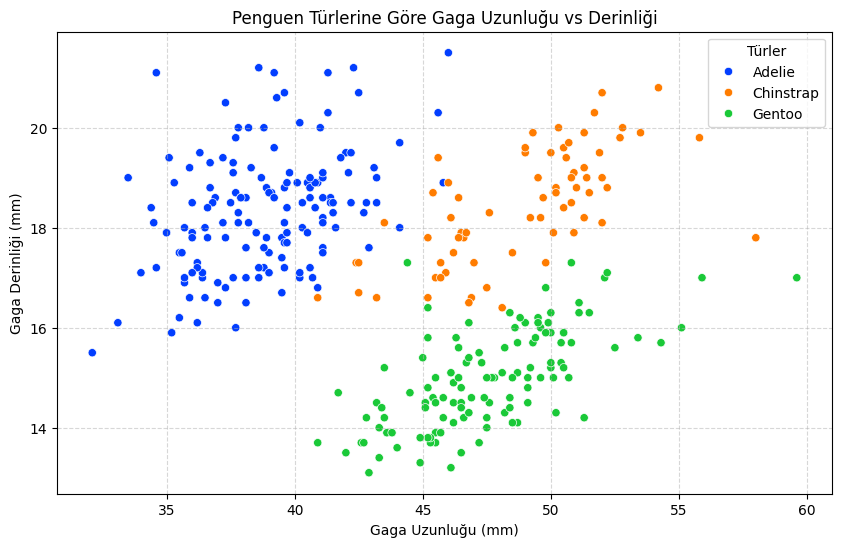

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Grafik Alanını Ayarlama
plt.figure(figsize=(10, 6))

# 2. Scatter Plot Çizimi
# x ekseni: Gaga Uzunluğu, y ekseni: Gaga Derinliği, Renk (hue): Tür
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='bright')

# 3. Başlık ve Etiketler
plt.title('Penguen Türlerine Göre Gaga Uzunluğu vs Derinliği')
plt.xlabel('Gaga Uzunluğu (mm)')
plt.ylabel('Gaga Derinliği (mm)')
plt.legend(title='Türler')
plt.grid(True, linestyle='--', alpha=0.5) # Okunabilirliği artırmak için ızgara

plt.show()

❓Gözlemlerinize dayanarak bu türleri ayırt edebiliyor musunuz?

**gentoo** türü, diğer 2 türe göre açıkça daha uzun yüzgeçlere sahip gibi görünüyor.

## Modelleme

Çoklu sınıf sorununu çözmek için iki strateji vardır:

- Bire bir (One vs One)
- Bire tüm (Bire geri kalan)(One vs All)


### One vs One
- Dataset içindeki **her bir sınıf çifti için bir model** eğitilir
- Tahmin aşamasında, **en fazla oyu alan sınıf** seçilir

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 


👍 Sınıf çiftlerine özgü farkları dikkate alır


👎 Çok sayıda alt model oluşturur: hesaplama açısından maliyetlidir


### One vs Rest (One vs All)

- **Her bir sınıf için**, diğer tüm sınıflara karşı **tek bir model** eğitilir
- Tahmin aşamasında, **en yüksek olasılığa sahip sınıf** seçilir

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍 Hesaplama açısından daha az maliyetlidir


👎 Sınıfların bir araya getirilmesiyle, sınıf çiftlerine özgü farklar kaybolur ve etkileri azalır

## One vs Rest

👇 Penguen türünü **sayısal (numerical)** feature’lara göre tahmin eden bir modeli değerlendirin. scikit-learn içinde, temel model olarak LogisticRegression kullanan bir One vs Rest multi-class classification uygulamak için doğru classifier’ı bulun. Modeli cross-validation ile değerlendirin ve bunun ne kadar süre aldığını kaydedin.

In [15]:
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 1. Özellikleri ve Hedefi Belirleme (Sadece sayısal özellikler)
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[numerical_features]
y = df['species']

# 2. One vs Rest Modelini Tanımlama
# LogisticRegression'ı sarmalıyoruz
model_ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# 3. Cross-Validation ve Süre Ölçümü
start_time = time.time()
scores_ovr = cross_val_score(model_ovr, X, y, cv=5)
end_time = time.time()

# 4. Sonuçları Kaydetme
duration_ovr = end_time - start_time
score_ovr = scores_ovr.mean()

print(f"One vs Rest Model Skoru: {score_ovr:.4f}")
print(f"Hesaplama Süresi: {duration_ovr:.4f} saniye")

One vs Rest Model Skoru: 0.9880
Hesaplama Süresi: 0.0871 saniye


## One vs One

👇 Bu sefer bir `OneVsOneClassifier` implement edin.

Yine cross-validation ile değerlendirin ve bunun ne kadar süre aldığını kaydedin.

In [16]:
from sklearn.multiclass import OneVsOneClassifier

# 1. One vs One Modelini Tanımlama
# Yine LogisticRegression kullanıyoruz
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))

# 2. Cross-Validation ve Süre Ölçümü
start_time = time.time()
scores_ovo = cross_val_score(model_ovo, X, y, cv=5)
end_time = time.time()

# 3. Sonuçları Kaydetme
duration_ovo = end_time - start_time
score_ovo = scores_ovo.mean()

print(f"One vs One Model Skoru: {score_ovo:.4f}")
print(f"Hesaplama Süresi: {duration_ovo:.4f} saniye")

One vs One Model Skoru: 0.9851
Hesaplama Süresi: 0.0795 saniye


ℹ️ Her iki modelin de çok benzer doğruluklara sahip olduğunu görüyoruz. Neden? <br><br>
Öncelikle, her iki model de sınıflandırması görece kolay olan bir dataset üzerinde oldukça iyi bir performans sergiliyor. İkinci olarak, ayırt edilmesi gereken yalnızca üç sınıf olduğunda, hem OvO hem de OvR yaklaşımları aslında **3 adet alt modelin** eğitilmesiyle sonuçlanır! Bu nedenle, çok benzer doğruluklar elde etmemiz beklenir.

❓ Zoolog, 10 denemenin 9’unda doğru türü bulabiliyor; siz onu geçebilir misiniz?

<details>
<summary> 👉Çözüm </summary>
Yaklaşık %98’lik bir ortalama doğruluk elde etmelisiniz; bu da %90’dan daha yüksektir. Yani algoritmamız zoologu geçiyor!

</details>

# 🏁 